In [ ]:
formal_names = {
    'FF-VUS-PR': 'FF-VUS',
    'FF-VUS-PR-GPU': 'FF-VUS-GPU',
    'AUC-PR': 'AUC',
    'VUS-PR': 'VUS',
    'RF': 'RF',
    'AFFILIATION': 'AFFILIATION',
    'RANGE-AUC-PR': 'Range-AUC',
}

color_palette = {
    'FF-VUS': '#99cae4',          # Good
    'FF-VUS-GPU': '#40da70',     # Very Good
    'AUC': '#f1a73f',                # Secondary competitor
    'VUS': '#b02a41',            # Main competitor
    'RF': '#a6d2c3',                    # Useless competitors
    'AFFILIATION': '#95bdaf',        # Useless competitors
    'Range-AUC': '#84a89c',       # Useless competitors
}

In [63]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)
    
df['Metric'] = df['Metric'].map(formal_names)
# df = df.rename({'Metric': 'Measure', 'Metric time': 'Execution time', 'Slope size': 'Buffer size'}, axis=1)

df.sample(3)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 79.26it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Slope size,Step,Global mask,Slopes,Existence,Confusion matrix,...,Position time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Metric,Metric value,Metric time,Anomalies coordinates time
1361,GHL/05_Lev_fault_Temp_corr_seed_27_vars_23.tes...,200000,1,144.0,512,1.0,True,precomputed,optimized,dynamic_plus,...,0.000161,0.001772,0.000128,0.004086,0.000086,0.000068,FF-VUS,0.002418,0.020184,NaN
42141,MGAB/6.test.out,99999,10,20.0,64,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,VUS,0.433755,1.225852,NaN
39365,KDD21/106_UCR_Anomaly_NOISEgaitHunt2_18500_312...,63999,1,650.0,8,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,VUS,0.020808,0.070195,NaN


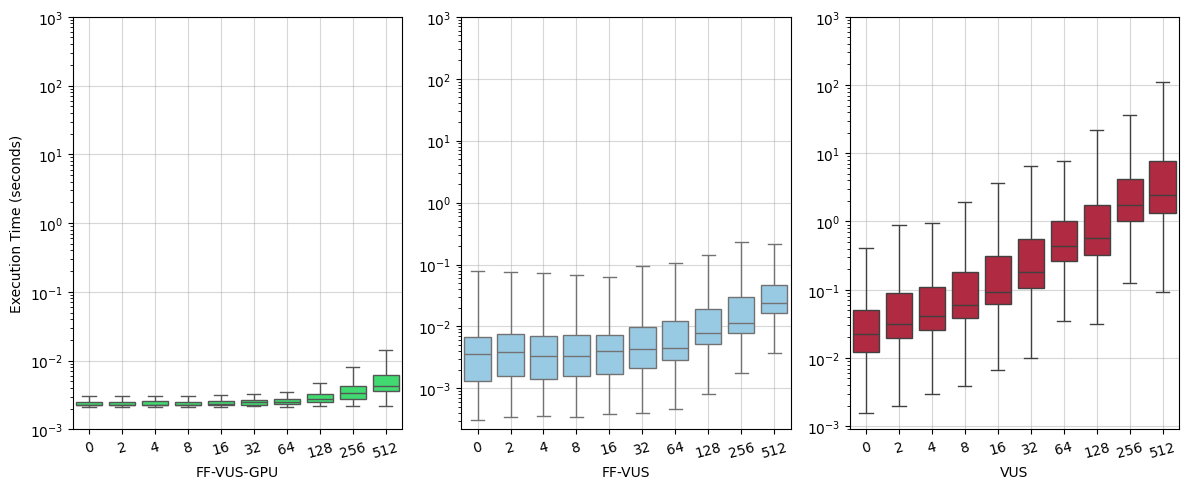

In [64]:
median_times = df.groupby('Metric')['Metric time'].median()
order = median_times.sort_values().index.to_list()
metrics = ['FF-VUS-GPU', 'FF-VUS', 'VUS']

fig = plt.figure(figsize=(12, 5))
for i, metric in enumerate(metrics):
    axis = fig.add_subplot(1, len(metrics), i+1)
    
    sns.boxplot(
        y='Metric time', 
        x='Slope size', 
        data=df[df['Metric'] == metric], 
        showfliers=False, 
        log_scale=True,
        color=color_palette[metric],
        saturation=1,
        ax=axis
    )
    axis.set_xlabel(metric)
    axis.set_ylabel('Execution Time (seconds)' if i == 0 else '')
    axis.tick_params(axis='x', labelrotation=15)
    axis.set_yticks([10**i for i in range(-3, 4)])
    axis.grid(axis='both', alpha=0.5)
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_comparison.svg'))
plt.show()

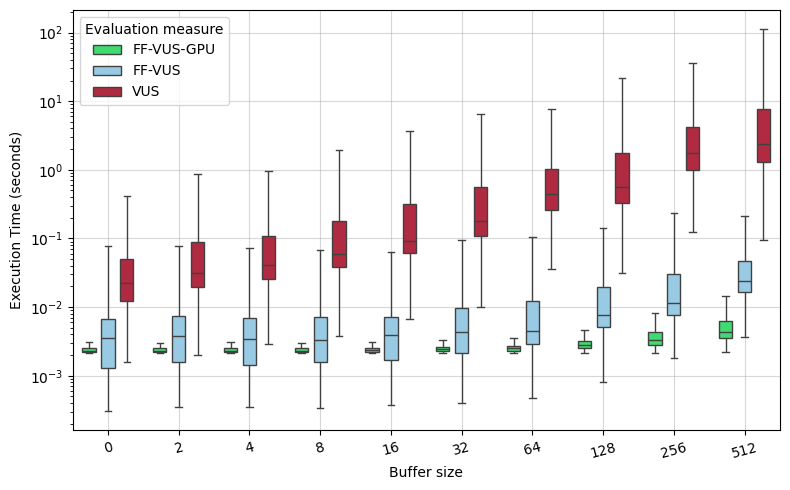

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    y='Metric time', 
    x='Slope size', 
    hue='Metric', 
    data=df, 
    showfliers=False, 
    log_scale=True, 
    palette=color_palette, 
    saturation=1,
    # fill=False, 
    gap=.3,
    # showmeans=True, 
    # meanline=True
)
plt.xlabel('Buffer size')
plt.ylabel('Execution Time (seconds)')
plt.xticks(rotation=15)
plt.grid(axis='both', alpha=0.5)
plt.legend(title='Evaluation measure')
plt.tight_layout()
plt.savefig(os.path.join(save_fig_path, 'exec_time_comparison.svg'))
plt.show()